In [1]:
#importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud as WC
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, make_scorer, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import gensim.downloader as api

In [2]:
raw_data = pd.read_csv('webpage data.csv')
raw_data_2 = raw_data

In [3]:
raw_data.head(5)

,Webpage_id,Domain,Url,Tag
0,1,www.fiercepharma.com,http://www.fiercepharma.com/marketing/tecfider...,news
1,2,www.fiercepharma.com,http://www.fiercepharma.com/pharma/novo-equipp...,news
2,3,www.fiercepharma.com,http://www.fiercepharma.com/pharma/another-exe...,news
3,4,www.fiercepharma.com,http://www.fiercepharma.com/pharma/teva-buy-bi...,news
4,5,www.fiercepharma.com,http://www.fiercepharma.com/marketing/actress-...,news


In [4]:
# Checking the Shape of the dataframe
raw_data.shape

(53229, 4)

In [5]:
# Checking the types and number of categories of webpages
print(f"List of classes for webpage: {raw_data['Tag'].unique()}\n")
print(f"Total no of classes for webpage: {len(raw_data['Tag'].unique())}\n")

# Checking the Dtypes, column names and no null and non-null values in the dataframe
print(raw_data.info())

List of classes for webpage: ['news' 'clinicalTrials' 'conferences' 'profile' 'forum' 'publication'
 'thesis' 'guidelines' 'others']

Total no of classes for webpage: 9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53229 entries, 0 to 53228
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Webpage_id  53229 non-null  int64 
 1   Domain      53229 non-null  object
 2   Url         53229 non-null  object
 3   Tag         53229 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB
None


In [6]:
# Now lets look at the type of url and domain for each category of news 

raw_data[raw_data['Tag']=='news'].head(3)

,Webpage_id,Domain,Url,Tag
0,1,www.fiercepharma.com,http://www.fiercepharma.com/marketing/tecfider...,news
1,2,www.fiercepharma.com,http://www.fiercepharma.com/pharma/novo-equipp...,news
2,3,www.fiercepharma.com,http://www.fiercepharma.com/pharma/another-exe...,news


In [7]:
raw_data[raw_data['Tag']=='clinicalTrials'].head(3)

,Webpage_id,Domain,Url,Tag
30,36,upload.umin.ac.jp,https://upload.umin.ac.jp/cgi-open-bin/ctr_e/c...,clinicalTrials
31,39,upload.umin.ac.jp,https://upload.umin.ac.jp/cgi-open-bin/ctr_e/c...,clinicalTrials
32,40,upload.umin.ac.jp,https://upload.umin.ac.jp/cgi-open-bin/ctr_e/c...,clinicalTrials


In [8]:
raw_data[raw_data['Tag']=='conferences'].head(3)

,Webpage_id,Domain,Url,Tag
550,1028,investors.alphatecspine.com,http://investors.alphatecspine.com/events.cfm,conferences
1033,1773,ir.alk.net,http://ir.alk.net/events.cfm,conferences
1485,2418,investor.anthera.com,http://investor.anthera.com/events.cfm,conferences


In [9]:
raw_data[raw_data['Tag']=='publication'].head(3)

,Webpage_id,Domain,Url,Tag
4164,6295,jvi.asm.org,http://jvi.asm.org/content/87/9/4994.long,publication
4165,6296,iai.asm.org,http://iai.asm.org/content/77/7/3033.long,publication
4166,6299,ec.asm.org,http://ec.asm.org/content/12/8/1087.long,publication


In [10]:
raw_data[raw_data['Tag']=='guidelines'].head(3)

,Webpage_id,Domain,Url,Tag
6954,10201,www.nice.org.uk,https://www.nice.org.uk/guidance/indevelopment...,guidelines
6955,10203,www.nice.org.uk,https://www.nice.org.uk/guidance/indevelopment...,guidelines
6956,10209,www.nice.org.uk,https://www.nice.org.uk/guidance/indevelopment...,guidelines


### Findings:

1. We just went throught some of the categories and checked if the categorgy has words that are similar in URL or Domain. For example 'long' is present is URL for Tags, 'guidance' is present in URL for guidelines etc

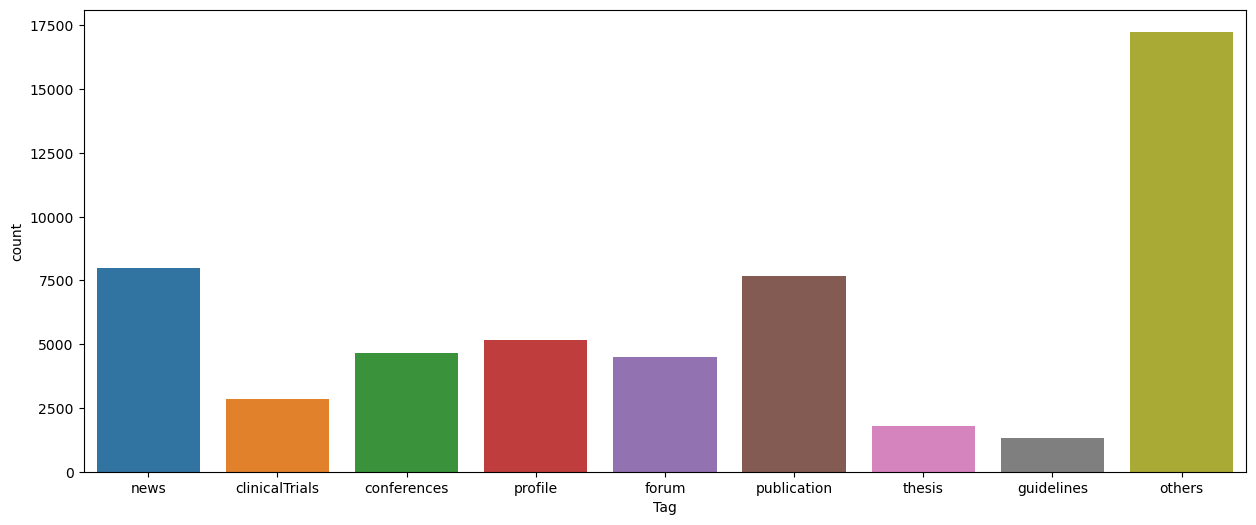

In [11]:
# Plotting the count graph for the categories.

plt.figure(figsize=(15,6))
sns.countplot(x='Tag',data=raw_data)
plt.show()

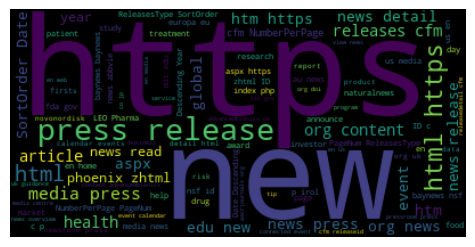

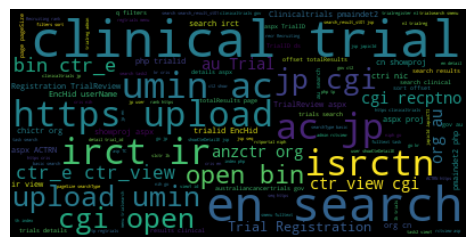

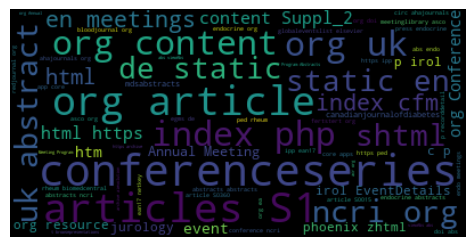

In [12]:
# Generating wordclouds for individual categories
all_news_urls = ' '.join(text for text in raw_data[raw_data['Tag']=='news']['Url']) 
wordcloudnews = WC().generate(all_news_urls)
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.imshow(wordcloudnews,interpolation='bilinear')
plt.axis('off')
plt.show()
all_clinicalTrials_urls = ' '.join(text for text in raw_data[raw_data['Tag']=='clinicalTrials']['Url']) 
wordcloudnews = WC().generate(all_clinicalTrials_urls)
plt.figure(figsize=(20,6))
plt.subplot(1,3,2)
plt.imshow(wordcloudnews,interpolation='bilinear')
plt.axis('off')
plt.show()
all_conferences_urls = ' '.join(text for text in raw_data[raw_data['Tag']=='conferences']['Url']) 
wordcloudnews = WC().generate(all_conferences_urls)
plt.figure(figsize=(20,6))
plt.subplot(1,3,3)
plt.imshow(wordcloudnews,interpolation='bilinear')
plt.axis('off')
plt.show()

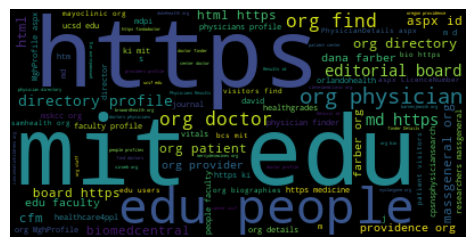

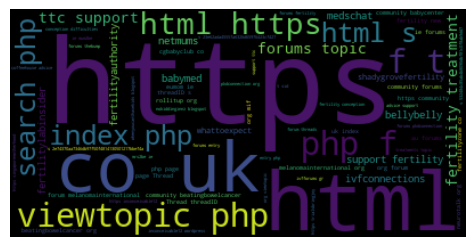

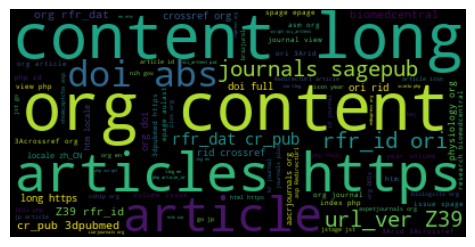

In [13]:
all_profile_urls = ' '.join(text for text in raw_data[raw_data['Tag']=='profile']['Url']) 
wordcloudnews = WC().generate(all_profile_urls)
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.imshow(wordcloudnews,interpolation='bilinear')
plt.axis('off')
plt.show()
all_forum_urls = ' '.join(text for text in raw_data[raw_data['Tag']=='forum']['Url']) 
wordcloudnews = WC().generate(all_forum_urls)
plt.figure(figsize=(20,6))
plt.subplot(1,3,2)
plt.imshow(wordcloudnews,interpolation='bilinear')
plt.axis('off')
plt.show()
all_publication_urls = ' '.join(text for text in raw_data[raw_data['Tag']=='publication']['Url']) 
wordcloudnews = WC().generate(all_publication_urls)
plt.figure(figsize=(20,6))
plt.subplot(1,3,3)
plt.imshow(wordcloudnews,interpolation='bilinear')
plt.axis('off')
plt.show()

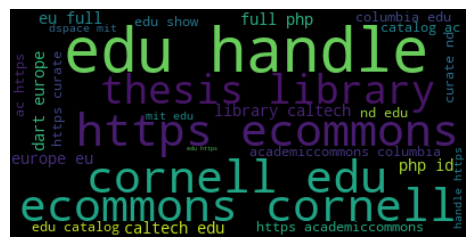

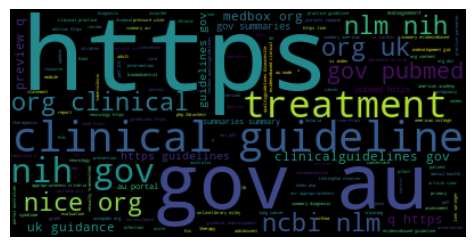

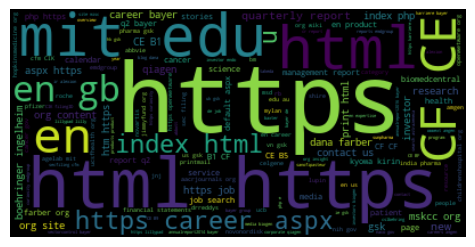

In [14]:
all_thesis_urls = ' '.join(text for text in raw_data[raw_data['Tag']=='thesis']['Url']) 
wordcloudnews = WC().generate(all_thesis_urls)
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.imshow(wordcloudnews,interpolation='bilinear')
plt.axis('off')
plt.show()
all_guidelines_urls = ' '.join(text for text in raw_data[raw_data['Tag']=='guidelines']['Url']) 
wordcloudnews = WC().generate(all_guidelines_urls)
plt.figure(figsize=(20,6))
plt.subplot(1,3,2)
plt.imshow(wordcloudnews,interpolation='bilinear')
plt.axis('off')
plt.show()
all_others_urls = ' '.join(text for text in raw_data[raw_data['Tag']=='others']['Url']) 
wordcloudnews = WC().generate(all_others_urls)
plt.figure(figsize=(20,6))
plt.subplot(1,3,3)
plt.imshow(wordcloudnews,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Findings:
1. Using the word cloud we build verify the words on each of the Tags. for example we see clinical trial in clinical trails tag, gov in guidelines tag, news, media press in news tag etc.

Now we need to extract features from text data so we need to clean our text.

In [15]:
raw_data.head(10)

,Webpage_id,Domain,Url,Tag
0,1,www.fiercepharma.com,http://www.fiercepharma.com/marketing/tecfider...,news
1,2,www.fiercepharma.com,http://www.fiercepharma.com/pharma/novo-equipp...,news
2,3,www.fiercepharma.com,http://www.fiercepharma.com/pharma/another-exe...,news
3,4,www.fiercepharma.com,http://www.fiercepharma.com/pharma/teva-buy-bi...,news
4,5,www.fiercepharma.com,http://www.fiercepharma.com/marketing/actress-...,news
5,6,www.fiercepharma.com,http://www.fiercepharma.com/pharma/celgene-s-o...,news
6,7,www.fiercepharma.com,http://www.fiercepharma.com/pharma/mylan-takes...,news
7,8,www.fiercepharma.com,http://www.fiercepharma.com/marketing/failed-e...,news
8,9,www.fiercepharma.com,http://www.fiercepharma.com/pharma/should-gsk-...,news
9,10,www.fiercepharma.com,http://www.fiercepharma.com/pharma/drug-pricin...,news


In [16]:
def clean_domain(text):
    text = re.findall(r'\..*\.',text)
    return text[0] if text else ''
raw_data['Domain'] = raw_data['Domain'].apply(clean_domain)

In [17]:
def clean_doman_2(text):
    text = re.sub(r'\.','',text)
    return text
raw_data['Domain'] = raw_data['Domain'].apply(clean_doman_2)

In [18]:
def cleaning_url(text): 
    text = re.sub((r'https?://www\.'),'',text)
    text = re.sub('/',' ',text)
    text = re.sub('[^a-zA-Z0-9]',' ',text)
    return text
raw_data['Url'] = raw_data['Url'].apply(cleaning_url)


def remove_domain_from_url(rowdata):
    text = re.sub(rowdata['Domain'],'',rowdata['Url'])
    text = re.sub(r'com','',text)
    text = re.sub(r'\d+','',text)
    return text

raw_data['cleaner_url'] = raw_data.apply(remove_domain_from_url,axis=1)
raw_data['Tag'] = LabelEncoder().fit_transform(raw_data['Tag'])

In [19]:
raw_data.dtypes

Webpage_id      int64
Domain         object
Url            object
Tag             int32
cleaner_url    object
dtype: object

#### Findings:
1. We checked that the common words such as http, https, www, com etc are removed from the Urls.
2. We aslo removed the domain name from the url to avoid overfitting on that feature.

## Text feature extraction
->we will be using the below features:
1. Bag of words
2. TF-IDF
3. Word Embeddings

In [20]:
#Bag of words
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,3))
features = vectorizer.fit_transform(raw_data['cleaner_url'])

In [21]:
print(features.shape)

(53229, 227467)


In [22]:
lr_model = LogisticRegression(max_iter=200)
f1_scorer = make_scorer(f1_score,average='weighted')
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(lr_model,features,raw_data['Tag'],cv=cv, scoring=f1_scorer)

In [23]:
print(scores)
print(scores.mean())

[0.74832054 0.86386524 0.75581205 0.67372116 0.67433572]
0.743210941932974


#### Findings:
1. With bag of words algorithm we have a feature spaces of 53229 x 227467. The number of columns increased a lot when we increase the ngrams_range.
2. With bag of words we get a decent accuracy of 74.31% when we run crossvalidation.
3. Problem with bag of words is that it do not store the context and do not give the words importance as they need.

In [24]:
#TF-IDF
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(raw_data['Url'])

In [25]:
features.shape

(53229, 50422)

In [26]:
lr_model = LogisticRegression(max_iter=200)
f1_scorer = make_scorer(f1_score,average='weighted')
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(lr_model,features,raw_data['Tag'],cv=cv, scoring=f1_scorer)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
print(scores)
print(scores.mean())

[0.79842812 0.8667059  0.79226239 0.681615   0.7167716 ]
0.7711566025177956


#### Findings:
1. With TF-IDF algorithm we have a feature spaces of 53229 x 50422. The number of columns decreased compared to the BOW
2. With TF-IDF we get a decent accuracy of 77.11% when we run crossvalidation.
3. It solves the problem of giving importance to the words but still fails to store the contextual meaning for the words.

In [28]:
# Word Embeddings
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hites\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stop_words = set(stopwords.words('english'))

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hites\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
lemmentier = WordNetLemmatizer()

In [32]:
def lemmentize_stopwords(data_row):
    tokens = data_row.split()
    initial_string=''
    for token in tokens:
        if token not in stop_words:
            initial_string = initial_string+' '+token
    return initial_string.strip()

In [33]:
raw_data['cleaner_url_2'] = raw_data['cleaner_url'].apply(lemmentize_stopwords)

In [34]:
w2v = api.load('word2vec-google-news-300')

In [35]:
def word_vector(data_row):
    vec = np.zeros((1,300))
    tokens = data_row.split()
    for token in tokens:
        try:
            vec = vec + (np.array([w2v[token]]))
        except:
            continue
    return vec

In [36]:
word_vec_series = raw_data['cleaner_url'].apply(word_vector)
word_vec = np.vstack(word_vec_series.apply(lambda x: x.squeeze()))
word_vec_scaled = StandardScaler().fit_transform(word_vec)
print(word_vec.shape)

(53229, 300)


In [ ]:
lr_model = LogisticRegression(max_iter=200)
f1_scorer = make_scorer(f1_score,average='weighted')
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(lr_model,word_vec_scaled,raw_data['Tag'],cv=cv, scoring=f1_scorer)


In [40]:
print(scores)
print(scores.mean())

[0.73538071 0.81596246 0.74184449 0.67138305 0.75404531]
0.7437232054367191


#### Findings:
1. In last I use the Word embeddings. I used google's word to vec library trained by google for google news.
2. I used the lemmentizer to change the words to first form for better context vector mapping.
3. Finally using the word embeddngs I got and dataset for 300 featues which is far less than the bag of words and TF-IDF. It gives a preety decent accuracy of 74% which is significant coparable to other two alorithms and hence reduce the dimentionality multifolds